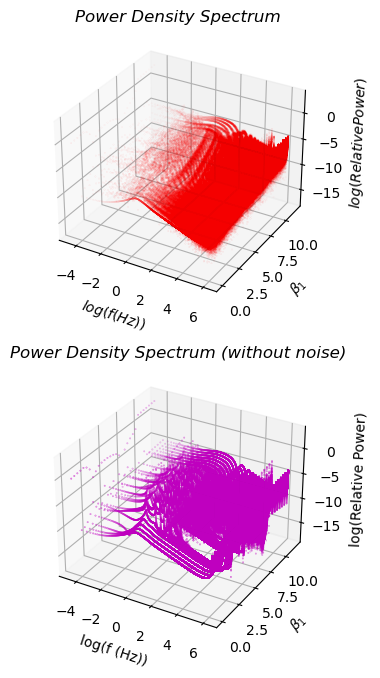

In [71]:
#3D模型：改变不同参数的值观察PDS的变化，图二的上下两个图像加起来是图一

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

Fs=100#采样频率
dt=1/Fs#采样周期，即相邻两数据点的时间间隔
n=int(500/dt)#信号长度

x=np.zeros(n,dtype=float)
y=np.zeros(n,dtype=float)
vx=np.zeros(n,dtype=float)
vy=np.zeros(n,dtype=float)
t=np.arange(n)*dt

ρ=1
β1=3
β2=3

C=4
J0=6,5

x_3d=[]
x_3d_fft_log=[]
y_3d=[]
vari_3d=[]
t_3d=[]
vari_0=0#被调整参数的初始值
vari_sl=0.4#被调整参数的步长
vari_sz=30#被调整参数的选取数量

#计算
for j in range(0,vari_sz):
    for i in range(0,n-1):
        vari=vari_0+vari_sl*j
        vx[i+1]=-ρ*(x[i]**3)+vari*(x[i]**2)+y[i]+J0+vari*(np.random.random()-0.5)
        vy[i+1]=-β2*(x[i]**2)-y[i]
        x[i+1]=x[i]+vx[i+1]*dt
        y[i+1]=y[i]+vy[i+1]*dt
        x_3d.append(x[i+1])
        y_3d.append(y[i+1])
        vari_3d.append(vari)
        t_3d.append((i+1)*dt)
    x_3d_fft_log.extend(np.log(2*np.abs(fft(x_3d[int(j*(n-1)):int((j+1)*(n-1))]))/n))

#无噪音(without noise)的解
x_wn=np.zeros(n,dtype=float)
y_wn=np.zeros(n,dtype=float)
vx_wn=np.zeros(n,dtype=float)
vy_wn=np.zeros(n,dtype=float)
x_3d_wn=[]
x_3d_wn_fft_log=[]
y_3d_wn=[]
vari_3d_wn=[]
t_3d_wn=[]
for j in range(0,vari_sz):
    for i in range(0,n-1):
        vari=vari_0+vari_sl*j
        vx_wn[i+1]=-ρ*(x_wn[i]**3)+vari*(x_wn[i]**2)+y_wn[i]+J0
        vy_wn[i+1]=-β2*(x_wn[i]**2)-y_wn[i]
        x_wn[i+1]=x_wn[i]+vx_wn[i+1]*dt
        y_wn[i+1]=y_wn[i]+vy_wn[i+1]*dt
        x_3d_wn.append(x_wn[i+1])
        y_3d_wn.append(y_wn[i+1])
        vari_3d_wn.append(vari_0+vari_sl*j)
        t_3d_wn.append((i+1)*dt)
    x_3d_wn_fft_log.extend(np.log(2*np.abs(fft(x_3d_wn[int(j*(n-1)):int((j+1)*(n-1))]))/n))

#绘图
fig=plt.figure(figsize=(9,8))

#x的傅里叶变换,双侧频谱
ax1=fig.add_subplot(2,1,1,projection='3d')
ax1.scatter(np.log(t_3d),vari_3d,x_3d_fft_log,s=0.001,c="r")
ax1.set_title(r'Power Density Spectrum',fontstyle='italic')
ax1.set_xlabel(r'$log(f (Hz))$')
ax1.set_ylabel(r'$\beta_1$')
ax1.set_zlabel(r'$log(Relative Power)$')
ax1.grid()

#无噪音的x的傅里叶变换,双侧频谱
ax2=fig.add_subplot(2,1,2,projection='3d')
ax2.scatter(np.log(t_3d_wn),vari_3d_wn,x_3d_wn_fft_log,s=0.1,c="m")
ax2.set_title(r'Power Density Spectrum (without noise)',fontstyle='italic')
ax2.set_xlabel(r'log(f (Hz))')
ax2.set_ylabel(r'$\beta_1$')
ax2.set_zlabel(r'log(Relative Power)')
ax2.grid()

plt.show()